# Running a GDS algorithm from Python

In [1]:
# hack to be able to import functions from utils
import sys
import os
sys.path.append(os.path.join(os.curdir, ".."))
# sys.path

In [2]:
from graphdatascience import GraphDataScience
from utils import create_projected_graph, plot_degree_distribution

In [3]:
gds = GraphDataScience("bolt://localhost:7687", auth=("neo4j", "<PASSWORD>"))

In [4]:
projected_graph_object = create_projected_graph(
    gds,
    graph_name="pgraphB",
    node_spec="NodeB",  
    relationship_spec={"LINK": {"orientation": "UNDIRECTED"}}
)
projected_graph_object

## Degree algorithm in write mode

In [5]:
gds.degree.write(
    projected_graph_object,
    writeProperty="degree"
)

nodePropertiesWritten                                                   800
centralityDistribution    {'p99': 89.00042724609375, 'min': 11.0, 'max':...
writeMillis                                                               3
postProcessingMillis                                                      7
preProcessingMillis                                                       0
computeMillis                                                             0
configuration             {'jobId': '03b9f802-83fe-4839-aac5-9d01035fb75...
Name: 0, dtype: object

In [6]:
degrees = gds.run_cypher("""
MATCH (n:NodeB)
RETURN n.id as node_id, n.degree as degree
""")
degrees.head(10)

,node_id,degree
0,0,25.0
1,1,25.0
2,2,23.0
3,3,25.0
4,4,30.0
5,5,30.0
6,6,24.0
7,7,23.0
8,8,29.0
9,9,29.0


## Degree algorithm in stream mode

In [7]:
degrees = gds.degree.stream(
    projected_graph_object,
)
degrees

,nodeId,score
0,2001,25.0
1,2002,25.0
2,2003,23.0
3,2004,25.0
4,2005,30.0
...,...,...
795,2796,76.0
796,2797,63.0
797,2798,64.0
798,2799,60.0


In [8]:
row = degrees.iloc[1]
node = gds.util.asNode(row["nodeId"])
node.get("id")

1

In [9]:
type(node)

neo4j.graph.Node

In [10]:
degrees["id"] = [n.get("id") for n in gds.util.asNodes(degrees['nodeId'].to_list())]
degrees.head()

,nodeId,score,id
0,2001,25.0,0
1,2002,25.0,1
2,2003,23.0,2
3,2004,25.0,3
4,2005,30.0,4


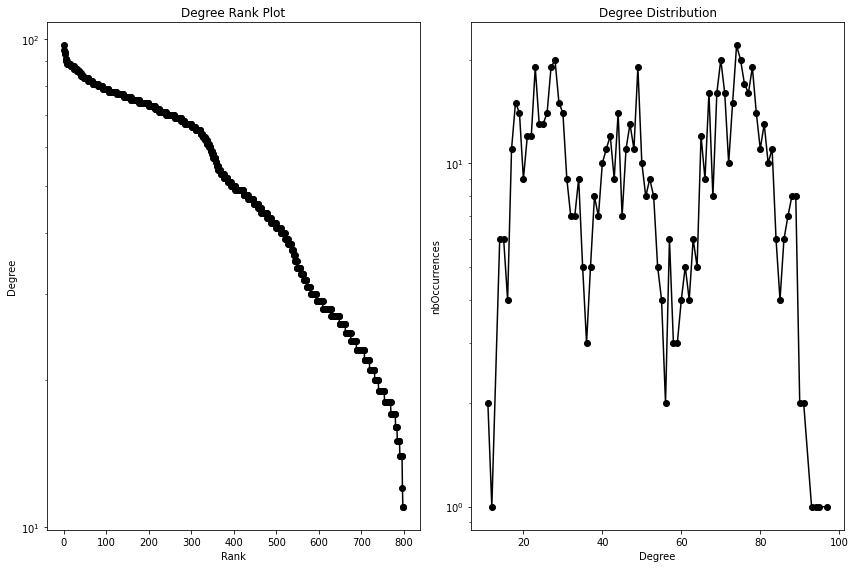

In [11]:
plot_degree_distribution(degrees.score);